# Exploratory Data Analysis
https://www.kaggle.com/stkbailey/teaching-notebook-for-total-imaging-newbies/notebook
https://www.kaggle.com/jerrythomas/exploratory-analysis
https://www.kaggle.com/mpware/stage1-eda-microscope-image-types-clustering

In [2]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from scipy.ndimage import imread
import matplotlib.pyplot as plt
import pandas as pd

# Some constants 
TRAIN_FOLDER = './data/train/'
INPUT_FOLDER = TRAIN_FOLDER + 'input/'
LABELS_FOLDER = TRAIN_FOLDER + 'labels/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()
print(patients)

['00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552', '003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1', '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e', '0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed', '01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf', '0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21', '0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426', '02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339', '03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776', '03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe', '03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a', '0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd', '04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e', '05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13', '0532c64c2fd0c4d3188cc751cdfd566b1cfba3d2693587

In [7]:
from skimage.color import rgb2gray

def load_input_image(patient):
    return rgb2gray(imread(INPUT_FOLDER + patient + '/images/' + os.listdir(INPUT_FOLDER + patient + '/images/')[0]))
    
def load_input_masks(patient):
    masks = os.listdir(INPUT_FOLDER + patient + '/masks/')
    return [imread(INPUT_FOLDER + patient + '/masks/' + mask) for mask in masks]

def get_num_nuclei(patient):
    return len(os.listdir(INPUT_FOLDER + patient + '/masks/'))

## Preview Images
Let's start by looking at some of the training images and a few of their respective masks

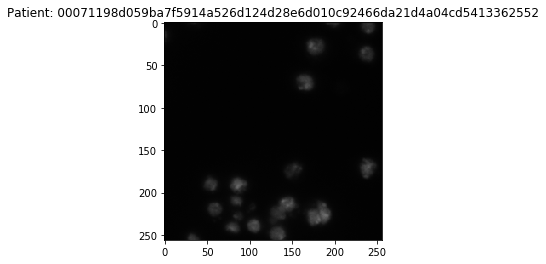

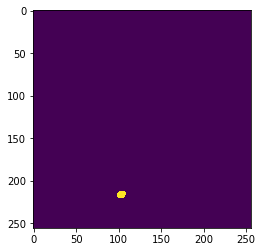

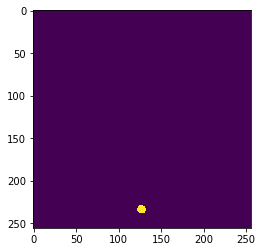

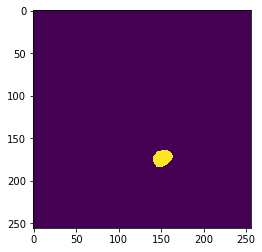

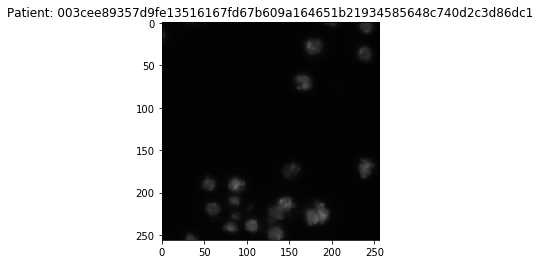

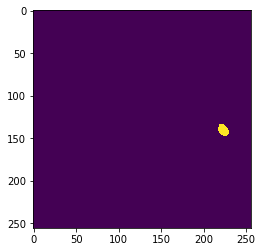

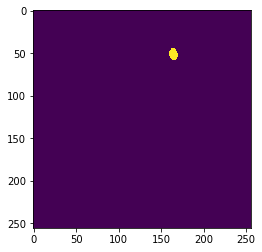

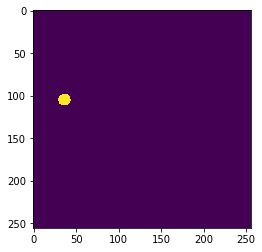

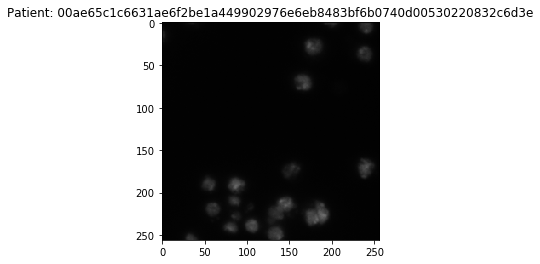

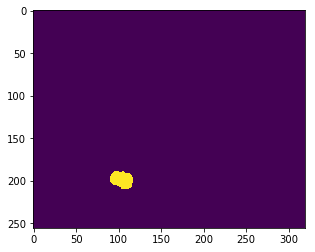

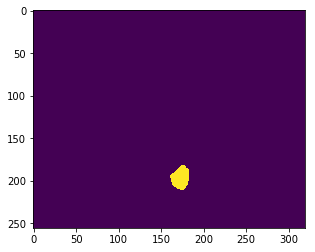

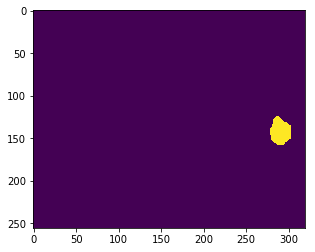

In [6]:
for patient in patients[:3]:
    masks = load_input_masks(patient)
    i = 1
    fig = plt.figure()
#     fig.add_subplot(1,len(masks),i)
    i+=1
    plt.title("Patient: {}".format(patient))
    plt.imshow(load_input_image(patients[0]))
    for mask in masks[:min(len(masks), 3)]:
#         fig.add_subplot(1,len(masks),i)
        plt.figure()
        i+=1
        plt.imshow(mask)

## Data Statistics
Let's look at some statistics of the dataset

In [19]:
# count number of masks for each dataset
num_nuclei = [get_num_nuclei(patient) for patient in patients]
df = pd.DataFrame({'patient': patients, 'num_nuclei': num_nuclei})
df = df.set_index('patient')
df.describe()

,num_nuclei
count,670.000000
mean,43.971642
std,47.962530
min,1.000000
25%,15.250000
50%,27.000000
75%,54.000000
max,375.000000


From the statistics described, we see that every image has at least one nuclei in it, and we can get up to a lot of nuclei (probably meaning that there are a lot of overlaps). In addition, we see that the standard deviation is pretty high, so we have a high distribution of different nuclei numbers per image. 

(array([ 17.,  82.,  69.,  70.,  83.,  52.,  34.,  35.,  22.,  22.,  22.,
         18.,  18.,  11.,  11.,  10.,   7.,   9.,   4.,   6.,   5.,   4.,
          5.,   4.,   6.,   3.,   6.,   5.,   2.,   4.,   2.,   3.,   0.,
          2.,   0.,   1.,   1.,   0.,   1.,   4.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([   1.        ,    5.98666667,   10.97333333,   15.96      ,
          20.94666667,   25.93333333,   30.92      ,   35.90666667,
          40.89333333,   45.88      ,   50.86666667,   55.85333333,
          60.84      ,   65.82666667,   70.81333333,   75.8       ,
          80.78666667,   85.77333333,   90.76      ,   95.74666667,
         100.73333333,  105.72      ,  110.70666667,  115.69333333,
         120.68      ,  125.66666667,  130.65333333,  135.64      ,
         140.626

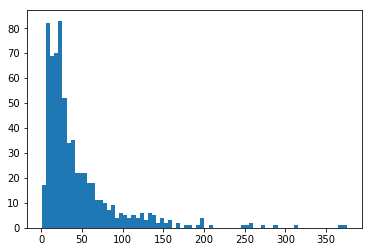

In [25]:
plt.hist(num_nuclei, bins=75)